# Basic Statistics

Statistics is often an overlooked part of football analytics 

Let's start with some basic statistics that you'll commonly see in football analytics.

## Mean

The mean is the average of a set of numbers. It is calculated by adding up all the numbers and then dividing by the number of numbers.


## Rolling Mean

The rolling mean is the average of a set of numbers over a specified period of time. It is calculated by taking the average of the numbers in a window of a specified size and then moving the window along the data set.

## Median

The median is the middle number in a sorted, ascending or descending, list of numbers and can be more descriptive of that data set than the average.

## Mode

The mode is the number that appears most frequently in a data set.

## Range

The range is the difference between the largest and smallest numbers in a data set.

## Variance

The variance is a measure of how far each number in the set is from the mean and is calculated by taking the differences between each number in the set and the mean, squaring the differences (to make them positive) and then dividing the sum of the squares by the number of numbers in the set.

## Standard Deviation

The standard deviation is a measure of how spread out the numbers in a data set are around the mean and is the square root of the variance.

## Percentiles

Percentiles are used to understand where a score falls in a range of scores. For example, if a player scores in the 90th percentile for a particular metric, it means that they scored higher than 90% of the other players in the data set.

## Skewness

Skewness is a measure of the asymmetry of the distribution of values in a data set around the mean. A negative skewness indicates that the data are skewed to the left, while a positive skewness indicates that the data are skewed to the right.

## Correlation

Correlation is a measure of the strength and direction of the relationship between two variables. A correlation of 1 indicates a perfect positive relationship, a correlation of -1 indicates a perfect negative relationship, and a correlation of 0 indicates no relationship.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
# Let's start by loading the data
df = pd.read_csv('~/Documents/GitHub/complete-football-analytics/Module 5/big5-clean.csv')

In [6]:
df.columns

Index(['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt',
       'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP',
       'PrgR'],
      dtype='object')

In [15]:
# Let's see how we can calculate these different statistics in Python

# Mean
# In pandas, we can use the mean() method to calculate the mean of a column in a DataFrame
print(df['Gls'].mean())

# We can also use the numpy library to calculate the mean
print(np.mean(df['Gls']))

# Let's say we want to calculate the mean of the 'Gls' column for Players aged 30 and above and only for forwards
print(df[(df['Age'] >= 30) & (df['Pos'].str.contains('FW'))]['Gls'].mean())

1.6902042229145033
1.6902042229145033
4.2317073170731705


In [33]:
# Rolling Mean
# In pandas, we can use the rolling() method to calculate the rolling mean of a column in a DataFrame
df['Gls'].rolling(window=5).mean()

# Note that we would never use a rolling mean for Goals, but for demonstration purposes, we can use it here

0       NaN
1       NaN
2       NaN
3       NaN
4       0.4
       ... 
2884    3.4
2885    3.4
2886    3.8
2887    3.8
2888    4.0
Name: Gls, Length: 2889, dtype: float64

In [16]:
# Median
# In pandas, we can use the median() method to calculate the median of a column in a DataFrame
print(df['Gls'].median())

# We can also use the numpy library to calculate the median
print(np.median(df['Gls']))

# Let's say we want to calculate the median of the 'Gls' column for Players aged 30 and above and only for forwards
print(df[(df['Age'] >= 30) & (df['Pos'].str.contains('FW'))]['Gls'].median())

0.0
0.0
2.0


In [17]:
# Mode
# In pandas, we can use the mode() method to calculate the mode of a column in a DataFrame
print(df['Gls'].mode())

0    0
Name: Gls, dtype: int64


In [18]:
# Range
# In pandas, we can use the max() and min() methods to calculate the range of a column in a DataFrame
print(df['Gls'].max() - df['Gls'].min())

# We can also use the numpy library to calculate the range
print(np.max(df['Gls']) - np.min(df['Gls']))


36
36


In [20]:
# Variance
# In pandas, we can use the var() method to calculate the variance of a column in a DataFrame
print(df['Gls'].var())

# We can also use the numpy library to calculate the variance
print(np.var(df['Gls']))

9.972899161879669
9.969447137247657
9.969447137247657


In [21]:
# They are different because pandas uses the sample variance by default, while numpy uses the population variance by default
# We can use the ddof parameter in the var() method to specify the degrees of freedom
print(df['Gls'].var(ddof=0))

9.969447137247657


In [22]:
# Standard Deviation
# In pandas, we can use the std() method to calculate the standard deviation of a column in a DataFrame
print(df['Gls'].std())

# We can also use the numpy library to calculate the standard deviation
print(np.std(df['Gls']))

3.157989734289785
3.157443132860457


In [23]:
# Same as with the variance, we can use the ddof parameter in the std() method to specify the degrees of freedom
print(df['Gls'].std(ddof=0))

3.157443132860457


In [24]:
# Percentiles
# In pandas, we can use the quantile() method to calculate the percentiles of a column in a DataFrame
print(df['Gls'].quantile(0.25)) # 25th percentile
print(df['Gls'].quantile(0.5)) # 50th percentile
print(df['Gls'].quantile(0.75)) # 75th percentile

# We can also use the numpy library to calculate the percentiles
print(np.percentile(df['Gls'], 25)) # 25th percentile
print(np.percentile(df['Gls'], 50)) # 50th percentile
print(np.percentile(df['Gls'], 75)) # 75th percentile

0.0
0.0
2.0
0.0
0.0
2.0


In [26]:
# Skewness
# In pandas, we can use the skew() method to calculate the skewness of a column in a DataFrame
print(df['Gls'].skew())

# We can also use the scipy library to calculate the skewness
print(stats.skew(df['Gls']))

3.578540247914825
3.576681963133535


In [28]:
# Correlation
# In pandas, we can use the corr() method to calculate the correlation between two columns in a DataFrame
print(df['Gls'].corr(df['Ast']))

# We can also use the numpy library to calculate the correlation
print(np.corrcoef(df['Gls'], df['Ast'])[0, 1])

0.545328341044825
0.545328341044825


<Axes: >

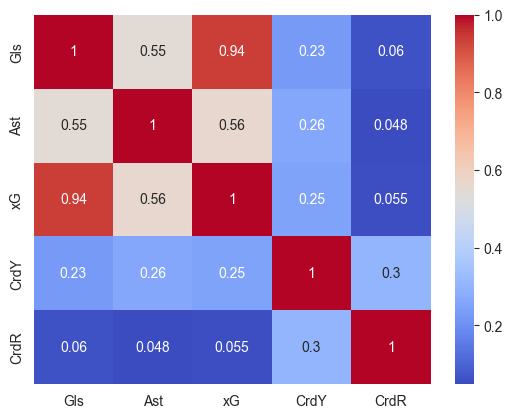

In [30]:
# We can also use the seaborn library to visualize the correlation
sns.heatmap(df[['Gls', 'Ast', 'xG', 'CrdY', 'CrdR']].corr(), annot=True, cmap='coolwarm')

In [ ]:
# These basic stats can be very useful in football analytics to understand the performance of players and teams